In [3]:
import pandas as pd
import numpy as np
csv_path = 'Group_by_fcustomerid/output_1.csv'
data = pd.read_csv(csv_path,encoding='ANSI')
data

,fcustomerid,county,Date,Year,Month,Week,Hour,Holiday,KWH_A
0,1,台北市,109/08/24,2020,8,一,11,N,0.69747
1,1,台北市,109/08/24,2020,8,一,12,N,0.47235
2,1,台北市,109/08/24,2020,8,一,13,N,0.49665
3,1,台北市,109/08/24,2020,8,一,14,N,0.48068
4,1,台北市,109/08/24,2020,8,一,15,N,0.49485
...,...,...,...,...,...,...,...,...,...
28925,1,台北市,113/01/14,2024,1,日,19,Y,0.37643
28926,1,台北市,113/01/14,2024,1,日,20,Y,0.43368
28927,1,台北市,113/01/14,2024,1,日,21,Y,0.50450
28928,1,台北市,113/01/14,2024,1,日,22,Y,0.46700


In [4]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#找year=2020
data_2020 = data[data['Year'] == 2020]
data_2020

,fcustomerid,county,Date,Year,Month,Week,Hour,Holiday,KWH_A
0,1,台北市,109/08/24,2020,8,一,11,N,0.69747
1,1,台北市,109/08/24,2020,8,一,12,N,0.47235
2,1,台北市,109/08/24,2020,8,一,13,N,0.49665
3,1,台北市,109/08/24,2020,8,一,14,N,0.48068
4,1,台北市,109/08/24,2020,8,一,15,N,0.49485
...,...,...,...,...,...,...,...,...,...
3012,1,台北市,109/12/30,2020,12,三,13,N,0.27143
3013,1,台北市,109/12/30,2020,12,三,15,N,0.26540
3014,1,台北市,109/12/30,2020,12,三,16,N,0.21843
3015,1,台北市,109/12/30,2020,12,三,17,N,0.14770


In [5]:
# 根據Date列對數據進行分組
grouped = data_2020.groupby('Date')
grouped

In [6]:
max_kwh = grouped.apply(lambda x: x.loc[x['KWH_A'].idxmax(), [ 'Hour', 'KWH_A']])
max_kwh

,Hour,KWH_A
Date,,
109/08/24,11,0.69747
109/08/25,22,0.96348
109/08/26,8,0.61328
109/08/27,9,0.63480
109/08/28,19,0.75778
...,...,...
109/12/26,22,0.34280
109/12/27,22,0.40970
109/12/28,21,0.33038


## 設定畫布格式

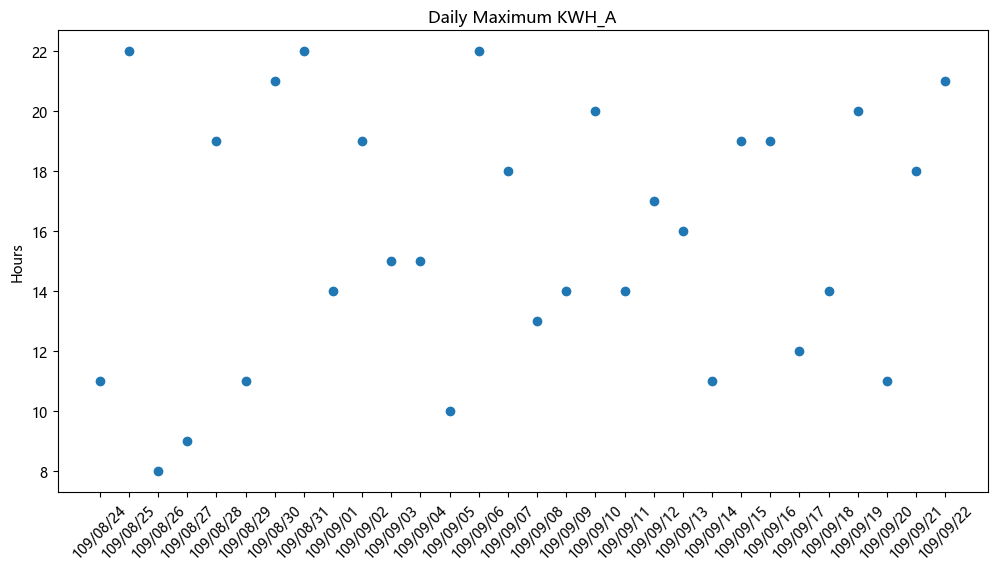

In [8]:
max_kwh = max_kwh.head(30)
# 重置索引
max_kwh = max_kwh.reset_index()

# 設置matplotlib中文顯示
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'

# 創建畫布


x = max_kwh['Date']
y = max_kwh['Hour']


fig, ax = plt.subplots(figsize=(12, 6))
# 設定 x 軸的日期格式
plt.xticks(rotation=45)
# ax.xaxis.set_major_formatter(plt.DateFormatter('%Y-%m-%d'))

# 設定 y 軸標籤
ax.set_ylabel('Hours')

# # 設定 y 軸刻度間隔為 1
# ax.set_yticks(range(min(y), max(y)+1))

# 設定標題
ax.set_title('Daily Maximum KWH_A')



sc = plt.scatter(x,y)
fig.savefig("分布圖.png")
plt.show()